# Intenzita hurikánové sezóny #
Nejprve musíme načíst všechny potřebné knihovny

In [7]:
.libPaths('~/R/x86_64-pc-linux-gnu-library/4.1')
library(performance)
library(ggplot2)
library(olsrr)
library(moments)
library(cowplot)
library(vtable)
library(corrplot)
library(e1071)  
library(vioplot)
library(see)
library(tidyverse)
library(Sleuth2)

options(width=160, repr.plot.width=11, repr.plot.height=7)

ERROR: Error in library(performance): there is no package called ‘performance’


In [8]:
install.packages("performance", dependencies=T, lib('~/R/x86_64-pc-linux-gnu-library/4.1'))

ERROR: Error in lib("~/R/x86_64-pc-linux-gnu-library/4.1"): could not find function "lib"


## Základní analýza dat ##
Načteme potřebna data z knihovny Sleuth2 a podíváme se na pár řádků z datasetu. Pokud jsou v datasetu nějaké na hodnoty, odstraníme je.

In [3]:
df <- ex1028
df <- na.omit(df)

In [4]:
head(df)

,Year,ElNino,Temperature,WestAfrica,Storms,Hurricanes,StormIndex
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1950,cold,-1,1,13,11,243
2,1951,warm,1,0,10,8,121
3,1952,neutral,0,1,7,6,97
4,1953,warm,1,1,14,6,121
5,1954,cold,-1,1,11,8,127
6,1955,cold,-1,1,12,9,198


In [5]:
tail(df)

,Year,ElNino,Temperature,WestAfrica,Storms,Hurricanes,StormIndex
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43,1992,warm,1,0,6,3,62
44,1993,warm,1,0,8,4,55
45,1994,warm,1,0,7,3,37
46,1995,cold,-1,1,19,11,237
47,1996,cold,-1,0,13,9,198
48,1997,warm,1,0,7,3,54


In [6]:
summary(df)

      Year          ElNino    Temperature   WestAfrica        Storms         Hurricanes      StormIndex   
 Min.   :1950   cold   :16   Min.   :-1   Min.   :0.000   Min.   : 4.000   Min.   : 2.00   Min.   : 28.0  
 1st Qu.:1962   neutral:16   1st Qu.:-1   1st Qu.:0.000   1st Qu.: 7.000   1st Qu.: 4.00   1st Qu.: 58.0  
 Median :1974   warm   :16   Median : 0   Median :0.000   Median : 8.500   Median : 5.50   Median : 95.5  
 Mean   :1974                Mean   : 0   Mean   :0.375   Mean   : 9.396   Mean   : 5.75   Mean   :100.9  
 3rd Qu.:1985                3rd Qu.: 1   3rd Qu.:1.000   3rd Qu.:11.000   3rd Qu.: 7.00   3rd Qu.:122.5  
 Max.   :1997                Max.   : 1   Max.   :1.000   Max.   :19.000   Max.   :12.00   Max.   :243.0  

Vidíme, že v datasetu je 48 záznamů. Každý záznam jsou data za jeden rok z období 1950 - 1997. Vysvětlovaná proměnná StormIndex popisuje intenzitu hurikánové sezóny. Stroms popisuje, kolik bouří za daný rok bylo, Hurricanes říká, kolik bylo hurikánů, WestAfrica popisuje, zda bylo v západní africe vlhko (1) nebo sucho (0). ElNino udává, zda byl rok celkově teplý, neutrální nebo chladný, k čemuž koresponduje proměnná Temperature, kde teplý je 1, studený je -1 a neutrální rok je 0.

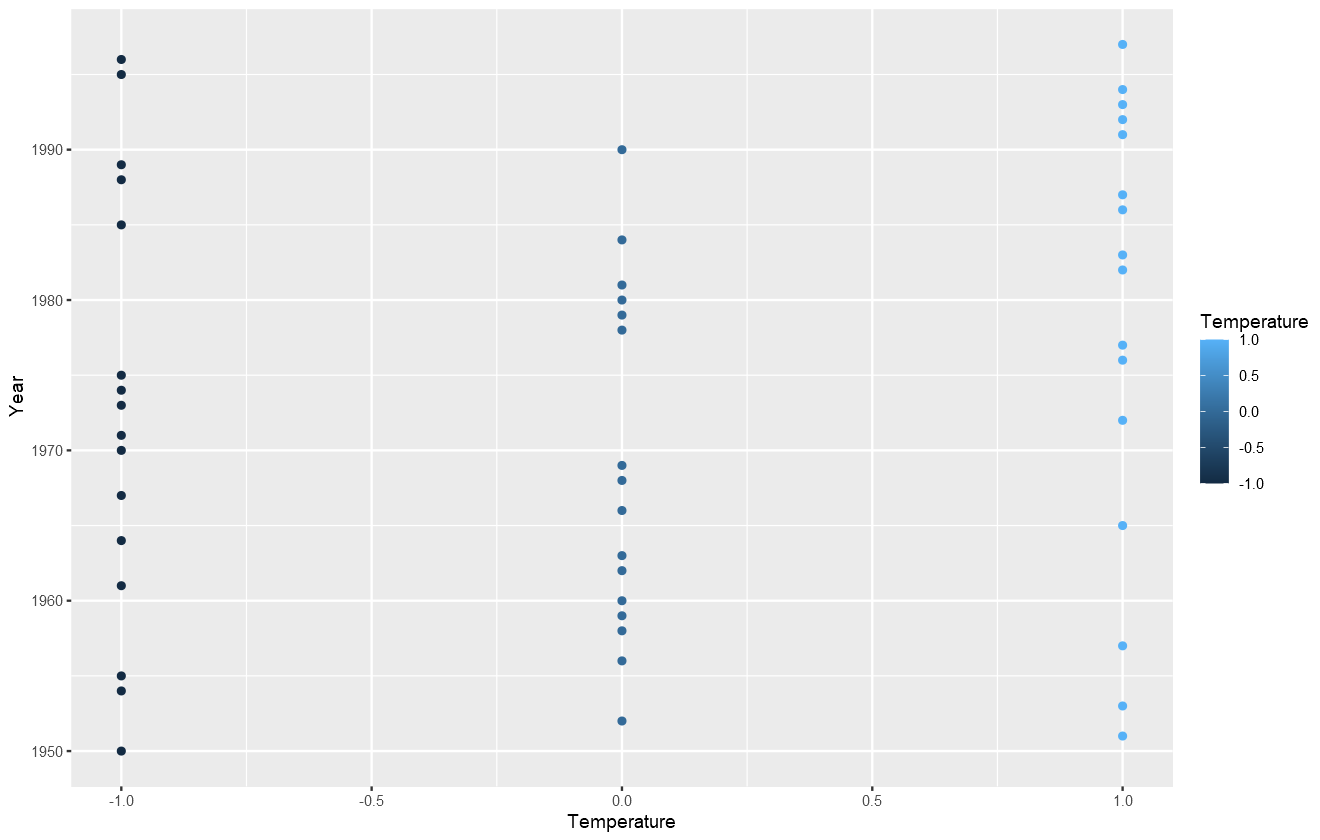

In [7]:
ggplot(df, aes(x=Temperature, y=Year, color=Temperature)) +
    geom_point()

In [8]:
data <- data.frame(values=c(df$Hurricanes),
                  group = rep(c("warm", "cold", "neutral"), c(length(df[df$ElNino == "warm",]), length(df[df$ElNino == "cold",]), length(df[df$ElNino == "neutral",]))))
ggplot(data, aes(x=Hurricanes, fill=group)) +
  geom_histogram(alpha=0.5, position="identity", bins=3)

ERROR: Error in data.frame(values = c(df$Hurricanes), group = rep(c("warm", "cold", : arguments imply differing number of rows: 48, 21


## Úloha 2 ##
V této úloze použijeme jako regresor numerickou proměnnou. Vybrali jsme si proměnnou Storms.

In [11]:
fit <- lm(StormIndex ~ Storms, data=df)
tmp <- predict(fit, interval="prediction")
df <- cbind(df, tmp)

Warning message in predict.lm(fit, interval = "prediction"):
"predictions on current data refer to _future_ responses
"


In [12]:
summary(fit)


Call:
lm(formula = StormIndex ~ Storms, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-58.165 -21.777   0.111  15.353  99.994 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -22.749     15.456  -1.472    0.148    
Storms        13.159      1.558   8.447 6.53e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 34.39 on 46 degrees of freedom
Multiple R-squared:  0.608,	Adjusted R-squared:  0.5995 
F-statistic: 71.36 on 1 and 46 DF,  p-value: 6.534e-11


Intercept má hodnotu -1,472, což vzhledem k tomu, že se hodnoty dostávají až zhruba k 270, nemá na výsledný odhad velký vliv. Na druhou stranu regresní koeficient Storms má hodnotu 8,4, z čehož vyplývá, že počet bouří v daném roce má velký vliv na celkovou intenzitu hurikánové sezóny.

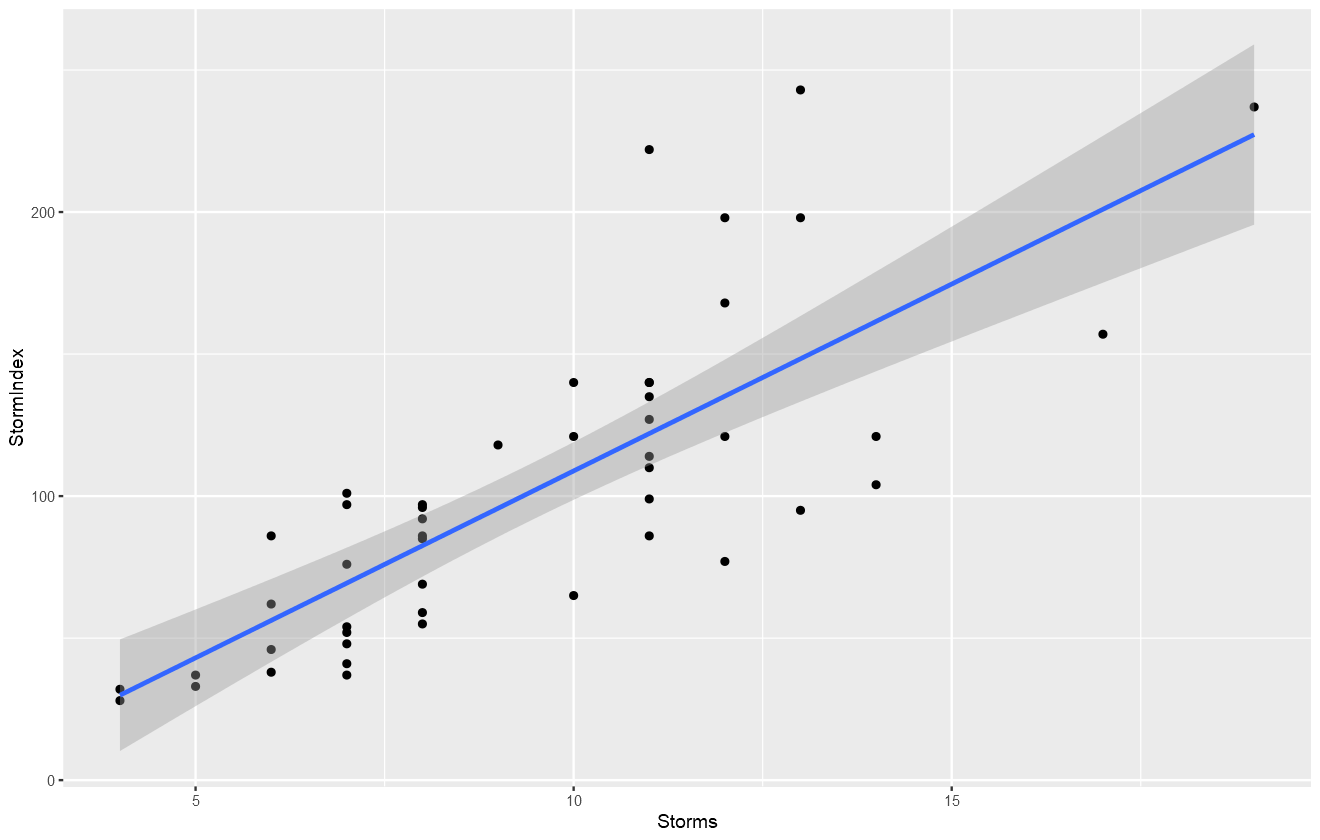

In [14]:
ggplot(df, aes(x=Storms, y=StormIndex)) +
    geom_point() +
    stat_smooth(method="lm", formula=y~x)

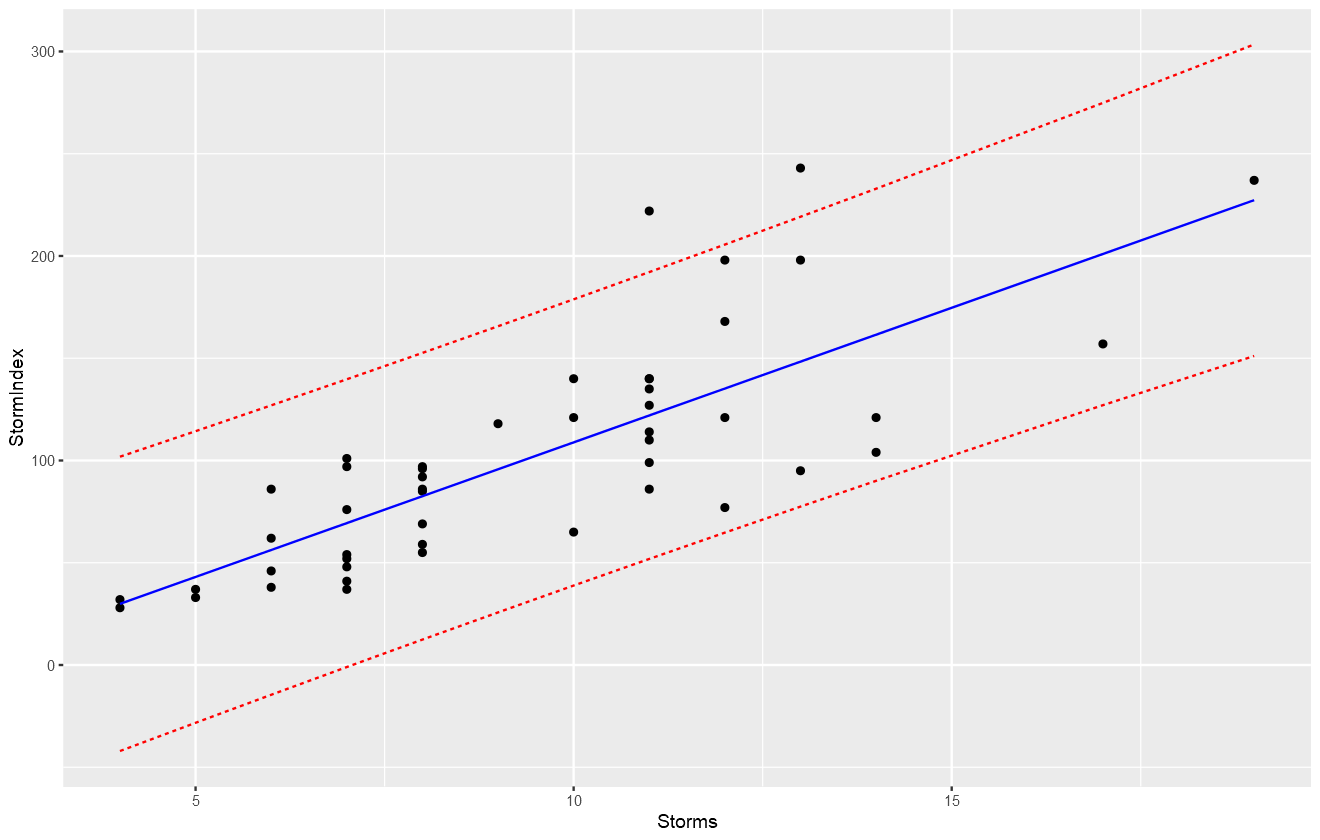

In [15]:
ggplot(df, aes(x=Storms, y=StormIndex)) +
    geom_point() +
    geom_line(aes(y=fit), color="blue") +
    geom_line(aes(y=lwr), color = "red", linetype = "dashed") +
    geom_line(aes(y=upr), color = "red", linetype = "dashed")

Z grafů to vypadá, že model moc přesně nepopisuje chování vysvětlované proměnné, jelikož model nevyhovuje datům, která máme. Na tato data by bylo možná lepší použít jiný než regresní model, nebo budou lepší predikce vidět až u použití více proměnných.

## Úloha 3 ##
V této úloze použijeme jako regresor kategoriální proměnnou. Jako regresor vezmeme proměnnou ElNino. Njeprve se podíváme, zda mají teploty vůbec vliv na Storm Index

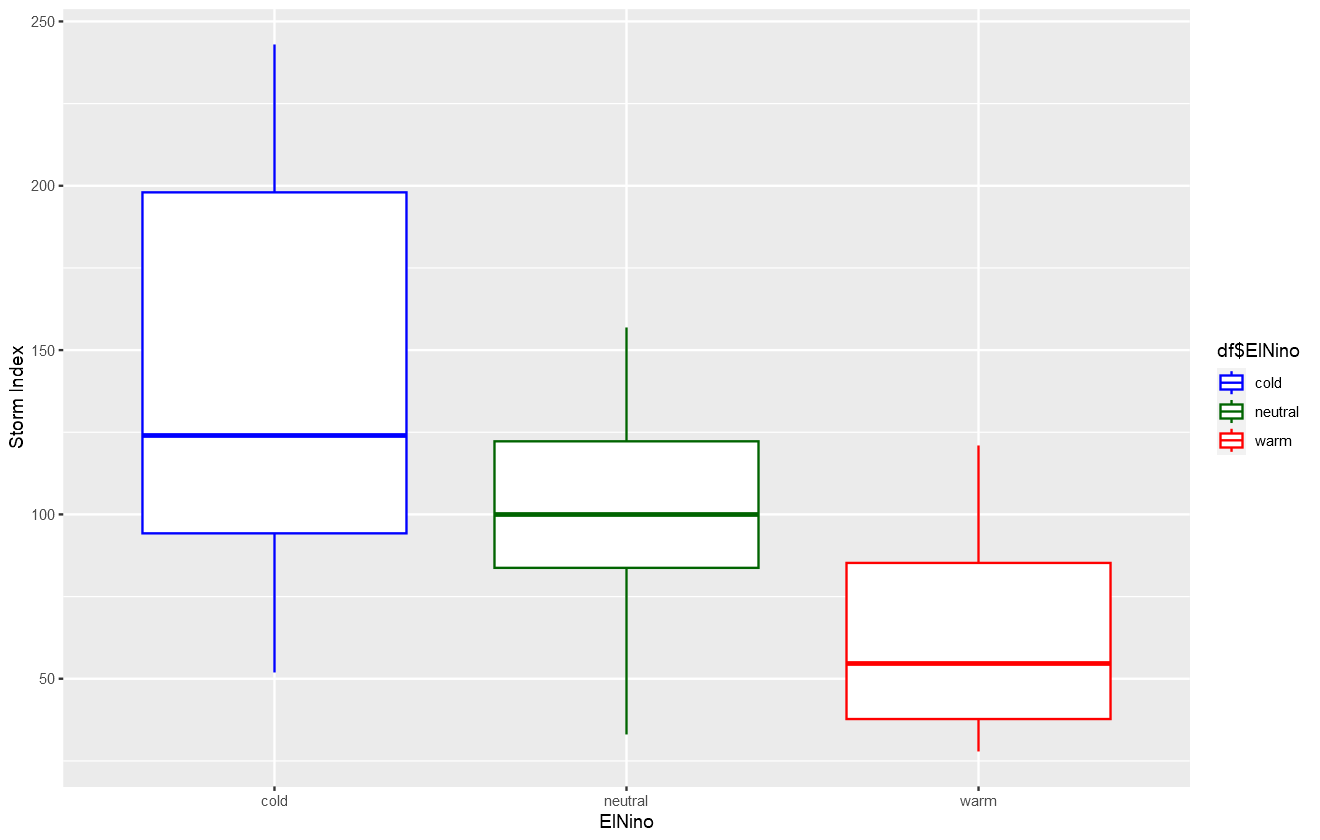

In [33]:
ggplot(df, aes(x=df$ElNino, y=df$StormIndex, color=df$ElNino)) +
        geom_boxplot(outlier.color="red", show.legend=T) + 
        labs(x="ElNino", y="Storm Index") + 
        scale_color_manual(values = c("blue", "darkgreen", "red"))

Z boxplotů to vypadá, že při studenějším počasí jsou intenzivnější bouře a s rostoucími teplotami intenzita klesá.

In [16]:
fit <- lm(df$StormIndex ~ df$ElNino)
summary(fit)


Call:
lm(formula = df$StormIndex ~ df$ElNino)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.062 -26.406  -3.937  24.844 102.938 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        140.06      11.20  12.506 3.03e-16 ***
df$ElNinoneutral   -39.63      15.84  -2.502   0.0161 *  
df$ElNinowarm      -77.88      15.84  -4.917 1.21e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 44.8 on 45 degrees of freedom
Multiple R-squared:  0.3495,	Adjusted R-squared:  0.3206 
F-statistic: 12.09 on 2 and 45 DF,  p-value: 6.285e-05


Model odhaduje u studeného počasí průměrný Storm index 140, u neutrálního počasí Storm index 100 a u teplého počasí Storm index 62. Z toho vyplývá, že opravdu čím tepleji je, tím menší intenzita bouřkové sezóny. Model překvapivě není moc dobrý, jelikož máme pouze tři možnosti u regresoru, ale u Storm Index je velká variance, takže tyto tři možnosti nemohou dostatečně přesně vystihnout chování vysvětlované proměnné.

## Úloha 4 ##
V této úloze vezmeme v modelu v potaz oba dosavad použité regresory.

In [37]:
fit <- lm(df$StormIndex~df$ElNino*df$Storms)
summary(fit)


Call:
lm(formula = df$StormIndex ~ df$ElNino * df$Storms)

Residuals:
   Min     1Q Median     3Q    Max 
-74.41 -18.27  -1.09  15.90  83.89 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -34.068     31.880  -1.069   0.2913    
df$ElNinoneutral             59.871     42.552   1.407   0.1668    
df$ElNinowarm                24.427     40.710   0.600   0.5517    
df$Storms                    15.652      2.776   5.638 1.31e-06 ***
df$ElNinoneutral:df$Storms   -8.142      3.888  -2.094   0.0423 *  
df$ElNinowarm:df$Storms      -5.571      4.371  -1.275   0.2094    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.62 on 42 degrees of freedom
Multiple R-squared:  0.6975,	Adjusted R-squared:  0.6615 
F-statistic: 19.37 on 5 and 42 DF,  p-value: 5.897e-10


I v tomto modelu to vypadá, že Storms mají velký význam v odhadu a čím více bouří, tím větší intenzita bouřkové sezóny. Vypadá to, že při teplejším počasí se celková intenzita bouří snižuje. V tomto modelu však má počasí samotné bez kombinace s počtem bouřek opačný vliv na predikce než u předchozího modelu.

Nejvýznamnějším regresorem je Storms, u kterého zamítáme, že by mohl mít hodnotu nula na hladině pěti procent, ale zamítli bychom i na mnohem nižší hladině. Další poměrně významnou komponentou je neutrální počasí v kombinaci s bouřkami, u které těsně zamítáme, že by mohla mít nulovou hodnotu na hladině pěti procent. U ostatních komponent nezamítáme, že by mohly mít nulovou hodnotu.

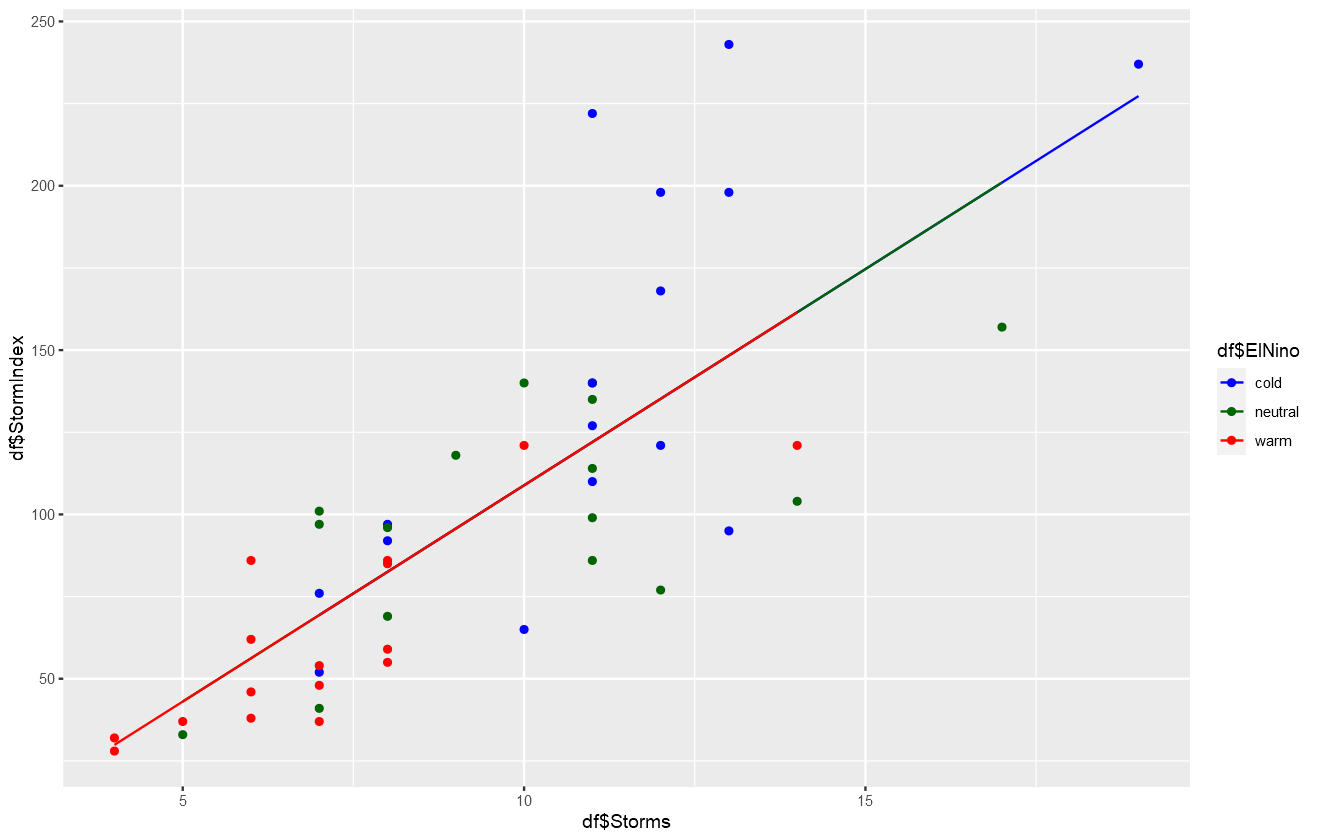

In [39]:
ggplot(df, aes(x=df$Storms, y=df$StormIndex, group=df$ElNino, color=df$ElNino)) +
    geom_point() +
    geom_line(aes(y=fit)) + 
    scale_color_manual(values = c("blue", "darkgreen", "red"))

## Úloha  5 ##
V této úloze použijeme v modelu další regresor. Vybereme si proměnnou Hurricanes.

In [58]:
fit_all <- lm(df$StormIndex~df$Storms*df$Hurricanes*df$ElNino*df$WestAfrica)
summary(fit_all)


Call:
lm(formula = df$StormIndex ~ df$Storms * df$Hurricanes * df$ElNino * 
    df$WestAfrica)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.270  -5.851  -0.320   4.331  46.730 

Coefficients: (1 not defined because of singularities)
                                                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)                                             242.852    180.753   1.344  0.19116   
df$Storms                                               -27.087     14.972  -1.809  0.08246 . 
df$Hurricanes                                           -33.891     43.787  -0.774  0.44618   
df$ElNinoneutral                                       -363.606    193.651  -1.878  0.07215 . 
df$ElNinowarm                                          -198.087    191.033  -1.037  0.30970   
df$WestAfrica                                          -561.698    215.831  -2.602  0.01534 * 
df$Storms:df$Hurricanes                                   5.231      3.397   1.540  0.136

Všechny regresory kromě WestAfrica mohou mít samy o sobě nulovou hodnotu v regresním modelu. Nejvýznamnější komponenty jsou ty, ve kterých je WestAfrica, z čehož vyplývá, že WestAfrica by mohla být nejvýznamnějším regresorem.

In [114]:
fit_less <- lm(df$StormIndex~df$ElNino:df$WestAfrica:df$Storms+df$ElNino:df$WestAfrica+df$Storms:df$ElNino:df$Hurricanes)
summary(fit_less)


Call:
lm(formula = df$StormIndex ~ df$ElNino:df$WestAfrica:df$Storms + 
    df$ElNino:df$WestAfrica + df$Storms:df$ElNino:df$Hurricanes)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.530 -11.322  -1.232   8.137  61.857 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                               24.8422     8.1305   3.055 0.004096 ** 
df$ElNinocold:df$WestAfrica               76.3350    35.1419   2.172 0.036148 *  
df$ElNinoneutral:df$WestAfrica           134.4015    36.6666   3.665 0.000751 ***
df$ElNinowarm:df$WestAfrica               63.5827    41.4629   1.533 0.133441    
df$ElNinocold:df$WestAfrica:df$Storms     -4.3153     3.3910  -1.273 0.210898    
df$ElNinoneutral:df$WestAfrica:df$Storms -12.6130     3.7418  -3.371 0.001732 ** 
df$ElNinowarm:df$WestAfrica:df$Storms     -4.2270     4.4699  -0.946 0.350301    
df$ElNinocold:df$Storms:df$Hurricanes      1.2095     0.1554   7.783 2.20e-09 ***
df$ElNinoneutra

Zmenšený model poměrně dobře vysvětluje zkoumanou proměnnou, ale má více než dvakrát méně komponent.

In [115]:
anova(fit_all,fit_less)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25,8759.934,NA,NA,NA,NA
2,38,19663.188,-13,-10903.25,2.393602,0.02951583


In [116]:
anova(fit_less,fit_all,test="Chisq")

,Res.Df,RSS,Df,Sum of Sq,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,19663.188,NA,NA,NA
2,25,8759.934,13,10903.25,0.003241482
